In [ ]:
import numpy as np
import pandas as pd

# Matrix reading from the files
def read_file(txt_file, mat_a):
    file = open(txt_file, "r")
    for line in file:
        ns = line.split()
        no = [float(n) for n in ns]
        mat_a.append(no)
    file.close()
X = []
y = []
read_file("/content/drive/MyDrive/hiv_deeplearning.txt", X)
read_file("/content/drive/MyDrive/hiv_activity_deeplearning.txt", y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("Data length for traing dataset: ",len(X_train))

Data length for traing dataset:  2354


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#converting the list data into the required formats
X_train_scaled = getattr(X_train_scaled, "tolist", lambda:X_train_scaled)()
X_test_scaled = getattr(X_test_scaled, "tolist", lambda: X_test_scaled)()
y_train = getattr(y_train, "tolist", lambda: y_train)()
y_test = getattr(y_test, "tolist", lambda: y_test)()

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
    metrics = [
               tf.keras.metrics.BinaryAccuracy(name='accuracy'),
               tf.keras.metrics.Precision(name='precision'),
               tf.keras.metrics.Recall(name='recall')
    ]
)

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
74/74 [==============================] - 5s 6ms/step - loss: 0.6097 - accuracy: 0.6767 - precision: 0.7119 - recall: 0.5546
Epoch 2/100
74/74 [==============================] - 1s 7ms/step - loss: 0.5205 - accuracy: 0.7387 - precision: 0.7572 - recall: 0.6752
Epoch 3/100
74/74 [==============================] - 1s 7ms/step - loss: 0.4926 - accuracy: 0.7557 - precision: 0.7802 - recall: 0.6875
Epoch 4/100
74/74 [==============================] - 1s 8ms/step - loss: 0.4862 - accuracy: 0.7545 - precision: 0.7627 - recall: 0.7130
Epoch 5/100
74/74 [==============================] - 1s 8ms/step - loss: 0.4775 - accuracy: 0.7642 - precision: 0.8042 - recall: 0.6761
Epoch 6/100
74/74 [==============================] - 1s 7ms/step - loss: 0.4309 - accuracy: 0.7952 - precision: 0.8290 - recall: 0.7254
Epoch 7/100
74/74 [==============================] - 1s 6ms/step - loss: 0.4107 - accuracy: 0.7965 - precision: 0.8269 - recall: 0.7315
Epoch 8/100
74/74 [=============================

In [ ]:
# Seeing the metrics of the trainig of the model
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18,8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

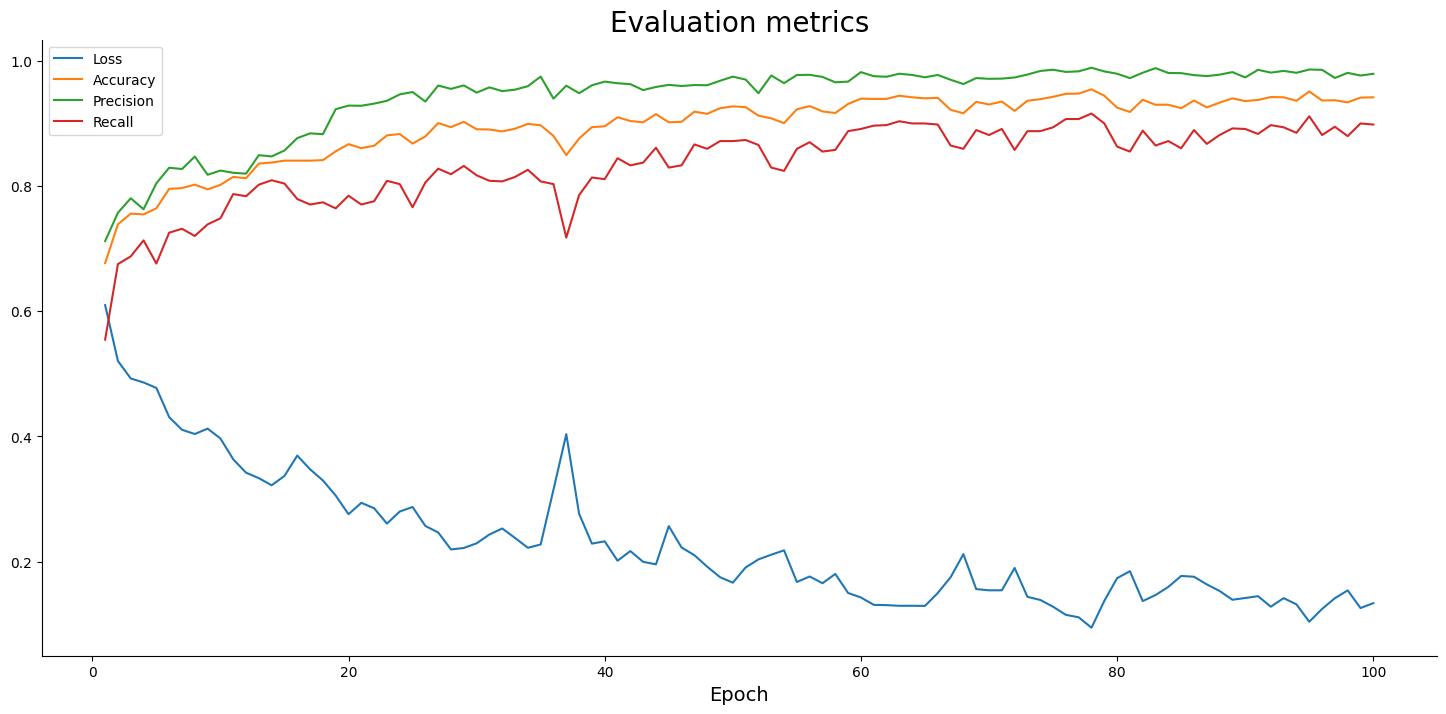

In [ ]:
plt.plot(np.arange(1,101), history.history['loss'], label='Loss')
plt.plot(np.arange(1,101), history.history['accuracy'], label='Accuracy')
plt.plot(np.arange(1,101), history.history['precision'], label='Precision')
plt.plot(np.arange(1,101), history.history['recall'], label='Recall')
plt.title('Evaluation metrics', size = 20)
plt.xlabel('Epoch', size= 14)
plt.legend();

In [ ]:
predictions = model.predict(X_test_scaled)
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]
print("Examples of the predicted classes")
prediction_classes[:20]

19/19 [==============================] - 0s 3ms/step
Examples of the predicted classes


[1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_classes))

[[255  27]
 [124 183]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuraccy : {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision : {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall : {recall_score(y_test, prediction_classes):.2f}')

Accuraccy : 0.74
Precision : 0.87
Recall : 0.60
